## Notebook description:

Visualizing air-sea flux on specific days of base and preindustrial scenarios

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
#from matplotlib import reload
import arrow
import gsw
%matplotlib inline

import xarray as xr
from datetime import datetime
from salishsea_tools import grid_tools, viz_tools


In [5]:


BR_2016_1_nc = nc.Dataset('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/KEY_MASBAL_LAT_TRANSPORT/old_ncs/MASSBAL_BR_2016_1_fullyear.nc')
BR_2015_2_nc = nc.Dataset('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/KEY_MASBAL_LAT_TRANSPORT/old_ncs/MASSBAL_BR_2015_2_fullyear.nc')

PI_2015_2_nc = nc.Dataset('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/KEY_MASBAL_LAT_TRANSPORT/old_ncs/MASSBAL_PI_2015_2_fullyear.nc')
PI_2015_3_nc = nc.Dataset('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/KEY_MASBAL_LAT_TRANSPORT/old_ncs/MASSBAL_PI_2015_3_fullyear.nc')

BR_nc = nc.Dataset('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/KEY_MASBAL_LAT_TRANSPORT/old_ncs/MASSBAL_BR_2015_2_fullyear.nc')
PI_nc = nc.Dataset('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/KEY_MASBAL_LAT_TRANSPORT/old_ncs/MASSBAL_PI_2015_3_fullyear.nc')



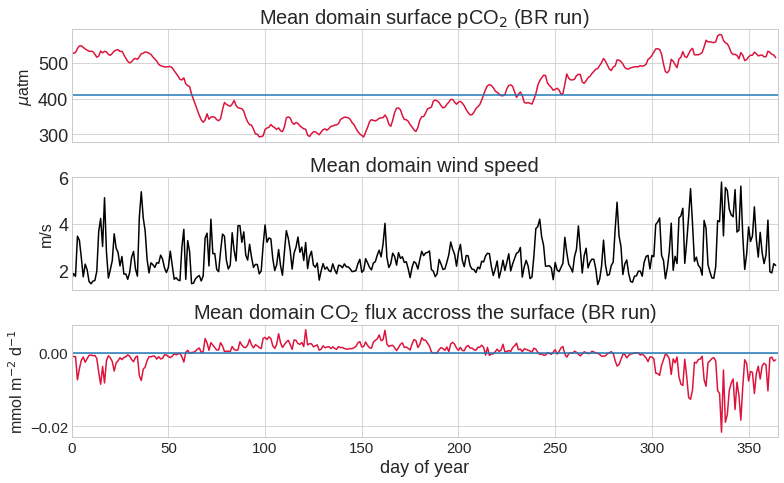

In [22]:
import pickle
car_suffix = '_ASflux_mean_perday_alg2.pkl'
car_suffix_sum = '_ASflux_sum_perday_alg2.pkl'
BR2_var = pickle.load(open('../KEY_MASBAL_LAT_TRANSPORT/pickles/'+'BR_2nd_2015'+car_suffix , 'rb')) 


wind_pco2_nc = nc.Dataset('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/NCS/pco2_wind_BR_2015_2.nc')
pco2_surf = wind_pco2_nc['model_output']['surface_pco2'][:]
wind_surf = wind_pco2_nc['model_output']['wind_mags'][:]
stor_flx_BR = BR_nc['model_output']['stor_flx']
stor_flx_PI = PI_nc['model_output']['stor_flx']

ts_BR = np.arange(0,np.size(stor_flx_PI),1)

fact = 1.1

fig = plt.figure(figsize=(10*fact,6.2*fact))

ax = fig.add_subplot(3,1,1)
ax.tick_params(axis='both', which='major', labelsize=18)

tplt = np.ma.masked_values(pco2_surf,1e20)
w2 = np.mean(tplt, axis = 1)
w3 = np.mean(w2, axis = 1)
ax.plot(ts_BR,w3,color = 'crimson',label = '2015 2nd BR year')
#plt.xlabel('day of year', fontsize = 18)

plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('$\mu$atm',  fontsize = 16)
plt.axhline(y=409)
plt.title('Mean domain surface pCO$_2$ (BR run)', fontsize = 20)

ax = fig.add_subplot(3,1,2)
ax.tick_params(axis='both', which='major', labelsize=18)

w2 = np.mean(wind_surf, axis = 1)
w3 = np.mean(w2, axis = 1)
ax.plot(ts_BR,w3,color = 'k',label = '2015 2nd BR year')
#plt.xlabel('day of year', fontsize = 18)
#plt.axhline(y=0)

plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('m/s', fontsize = 16)
plt.title('Mean domain wind speed', fontsize = 20)

ax = fig.add_subplot(3,1,3)
ax.tick_params(axis='both', which='major', labelsize=15)

ax.plot(ts_BR,BR2_var,color = 'crimson',label = '2015 2nd BR year')
plt.xlim([0,365])
plt.xlabel('day of year', fontsize = 18)
plt.axhline(y=0)
ax.set_ylabel('mmol m$^{-2}$ d$^{-1}$', fontsize = 16)
plt.title('Mean domain CO$_2$ flux accross the surface (BR run)', fontsize = 20)
plt.tight_layout()

In [ ]:
# t_nc = nc.Dataset('/results2/SalishSea/nowcast-green.201806/01jan18/SalishSea_1h_20180101_20180101_grid_T.nc')
# surfdat_1 = t_nc.variables['votemper'][0,0,:,:]

# fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
# cmap = cm.cm.matter
# tplt = np.ma.masked_values(surfdat_1[:,:],0)
# v_min = 2000
# v_max = 2000

# viz_tools.set_aspect(ax)
# mesh = ax.pcolormesh(tplt, cmap=cm.cm.matter, vmin=0, vmax=20)
# viz_tools.plot_land_mask(ax, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')


# ax.set_xlabel('x Index', fontsize = 20 )
# ax.set_ylabel('y Index', fontsize = 20 )

# pat = patches.Rectangle((20,0),398-20,898-20,linewidth=2,edgecolor='g',facecolor='none')
# ax.add_patch(pat)

# plt.xticks(fontsize=8)
# plt.yticks(fontsize=8)
# cmap.set_bad('aliceblue')
# plt.suptitle('domain for calculation',fontsize=20)


In [ ]:
stor_flx_BR = BR_nc['model_output']['stor_flx']
stor_flx_PI = PI_nc['model_output']['stor_flx']

ts_BR = np.arange(0,np.size(stor_flx_PI),1)


# stor_mol_PI = PI_nc['model_output']['stor_mol_PI']
# stor_mol_surf_PI = PI_nc['model_output']['stor_mol_surf_PI']
# stor_20_PI = PI_nc['model_output']['stor_mol_20_PI']
# stor_20_100_PI = PI_nc['model_output']['stor_mol_20_100_PI']
# stor_deep_PI = PI_nc['model_output']['stor_mol_deep_PI']
# stor_flx_PI = PI_nc['model_output']['stor_flx_PI']
# stor_trans_PI =PI_nc['model_output']['stor_trans_PI']
# stor_trans_PI_JS =PI_nc['model_output']['stor_trans_PI_JS']

# ts_PI = np.arange(0,np.size(stor_trans_BR),1)

In [ ]:
stor_flx_ar = stor_flx_BR[:]

flux_sorted = np.sort(stor_flx_ar)
largeflux_1_out = flux_sorted[0]
largeflux_2_out = flux_sorted[1]
date_1_out = np.where(stor_flx_ar == largeflux_1_out)
date_2_out = np.where(stor_flx_ar == largeflux_2_out)
#
largeflux_1_in = flux_sorted[len(flux_sorted)-1]
largeflux_2_in = flux_sorted[len(flux_sorted)-2]
date_1_in = np.where(stor_flx_ar == largeflux_1_in)
date_2_in = np.where(stor_flx_ar == largeflux_2_in)


In [ ]:
fig = plt.figure(figsize=(10*1.4,5*1.4))

ax = fig.add_subplot(3,1,1)
ax.plot(ts_BR,stor_flx_ar,color = 'crimson',label = '2015 2nd BR year')
ax.plot(date_1_in,largeflux_1_in, color = 'blue', marker = 'o')
ax.plot(date_2_in,largeflux_2_in, color = 'blue', marker = 'o')
ax.plot(date_1_out,largeflux_1_out, color = 'blue', marker = 'o')
ax.plot(date_2_out,largeflux_2_out, color = 'blue', marker = 'o')
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('CO2 flux accross the surface')

ax = fig.add_subplot(3,1,2)
ax.plot(ts_BR[stor_flx_ar>0],stor_flx_ar[stor_flx_ar>0],color = 'crimson',label = '2015 2nd BR year')
ax.plot(date_1_in,largeflux_1_in, color = 'blue', marker = 'o')
ax.plot(date_2_in,largeflux_2_in, color = 'blue', marker = 'o')

plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('CO2 flux accross the surface')

ax = fig.add_subplot(3,1,3)
ax.plot(ts_BR[stor_flx_ar<0],stor_flx_ar[stor_flx_ar<0],color = 'crimson',label = '2015 2nd BR year')
ax.plot(date_1_out,largeflux_1_out, color = 'blue', marker = 'o')
ax.plot(date_2_out,largeflux_2_out, color = 'blue', marker = 'o')
plt.xlim([0,365])
ax.set_ylabel('mols C/day')
plt.title('CO2 flux accross the surface')

In [ ]:
def get_dates(start,end,ftype, sdir):
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    arrow_array = []
    dddd_ar = []
    ddmmmyy_ar = []
    sens_ar =[]
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)

    dayslen = len(arrow_array)
    for i in range(0,dayslen):
        tdate = arrow_array[i][0]
        ddmmmyy = tdate.format('DDMMMYY').lower()
        ymd = tdate.format('YYYYMMDD')
        dddd = tdate.format('DDDD')
        dddd_ar.append(dddd)
        ddmmmyy_ar.append(ddmmmyy)
        nc_sens = '/data/tjarniko/results/BASERUN_EXP/MAIN/' + sdir + '/ncs/SKOG_1d_*'+ ftype +'*' + ymd + '-' + ymd + '.nc'
        
        tnc_sens = glob.glob(nc_sens)
        sens_ar.append(tnc_sens[0])
    return sens_ar, dddd_ar, ddmmmyy_ar


In [ ]:
# start = '2015-01-01'
# end = '2015-12-31'
# sdir = 'BR_2nd_2015'

# ftype = 'carp'
# ftype2 = 'grid_T'

# sdir2 = 'PI_3rd_2015'




# sens_ar_carp, dddd_ar, ddmmmyy_ar = get_dates(start,end,ftype, sdir)
# sens_ar_grid, dddd_ar, ddmmmyy_ar = get_dates(start,end,ftype2, sdir)

# sens_ar_carp2, dddd_ar, ddmmmyy_ar = get_dates(start,end,ftype, sdir2)
# sens_ar_grid2, dddd_ar, ddmmmyy_ar = get_dates(start,end,ftype2, sdir2)



In [ ]:
# print(sens_ar_carp2[0])
# print(sens_ar_grid2[0])

# tdepths = 30
# tsra = 29
# ttera = 7
# ttara = 2200 * 1e-3
# tdra = 2150 * 1e-3
# tzero = 0
# #tpressure = 0
# tpressure =1
# tzero = tpressure * 0 

# tsra_psu = tsra*35/35.16504
# ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

# response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
#                    sil=tzero, phos=tzero, patm=tpressure, depth=tdepths, lat=tzero, 
#                     optcon='mmol/m3', optt='Tinsitu', optp='m',
#                     optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
# pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup
# print(pco2)

In [ ]:
# lf_dates = [date_1_in[0][0],date_2_in[0][0], date_1_out[0][0], date_2_out[0][0]]

# lf_carps = []
# lf_grids = []
# lf_hrdates = []
# lf_carps2 = []
# lf_grids2 = []
# for i in range(0,len(lf_dates)):
#     lf_carps.append(sens_ar_carp[lf_dates[i]])
#     lf_grids.append(sens_ar_grid[lf_dates[i]])
#     lf_carps2.append(sens_ar_carp2[lf_dates[i]])
#     lf_grids2.append(sens_ar_grid2[lf_dates[i]])
# #     print()
# #     print(lf_dates[i])
#     t_date = lf_dates[i]
#     lf_hrdates.append(ddmmmyy_ar[t_date])
# #     print(lf_hrdates[i])
# #     print(dddd_ar[t_date])
# # #     print(lf_carps[i])
# # #     print(lf_grids[i])

In [ ]:
# def oned_moxy(tsal, ttemp, tdic, tta, pres_atm):

#     size_box = np.shape(tdic)
#     size_0 = size_box[0]
#     size_1= size_box[1]

#     tsra = np.ravel(tsal)
#     ttera = np.ravel(ttemp)
#     ttara = np.ravel(tta) * 1e-3
#     tdra = np.ravel(tdic) * 1e-3
#     tzero = np.zeros_like(tsra)
#     tpressure = np.zeros_like(tsra)
#     #tdepth = np.zeros_like(tsra)
#     tpressure[:] = pres_atm
#     tzero = tpressure * 0 
        
#     tsra_psu = tsra*35/35.16504
#     ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

#     response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
#                        sil=tzero, phos=tzero, patm=tpressure, depth=tzero, lat=tzero, 
#                         optcon='mol/m3', optt='Tinsitu', optp='m',
#                         optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
#     pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

#     pHr = pH.reshape(size_0,size_1)
#     OmAr = OmegaA.reshape(size_0,size_1)
#     pco2r = pco2.reshape(size_0,size_1)
    
#     return pHr, OmAr, pco2r

## SUMMER = flux in

In [ ]:

# fig = plt.figure(figsize=(12*1.8,5*1.8))
# i = 0
# t_nc = nc.Dataset(lf_carps[i])
# t_ncg = nc.Dataset(lf_grids[i])
# tdic = t_nc['dissolved_inorganic_carbon'][0,0,:,:]
# tco2 = t_nc['co2_flux_mmol_m2_s'][0,:,:]

# tta = t_nc['total_alkalinity'][0,0,:,:]
# ttemp = t_ncg['votemper'][0,0,:,:]
# tsal = t_ncg['vosaline'][0,0,:,:]
# pHr, OmAr, pco2r = oned_moxy(tsal, ttemp, tdic, tta, 1)

# #winds
# w = nc.Dataset('/ocean/tjarniko/MEOPAR/WINDFILES_interp/YEAR2015_day' + str(lf_dates[i]) +'.nc')
# twind = w['daily_avg_windmag'][:][:]

# ax = fig.add_subplot(1,5,1)
# t_cmap = cm.cm.matter
# t_vmin = 1900
# t_vmax = 2300
# tplt = np.ma.masked_values(tdic,0)
# mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
# viz_tools.set_aspect(ax)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_title('surface DIC', fontsize = 16)

# cbar = plt.colorbar(mesh)
# cbar.set_label('DIC [umol/L]', fontsize = 16)

# ax = fig.add_subplot(1,5,2)
# t_cmap = cm.cm.balance
# t_vmin = 0
# t_vmax = 800
# tplt = np.ma.masked_values(pco2r,1e20)
# mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
# viz_tools.set_aspect(ax)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_title('surface pCO2', fontsize = 16)
# cbar = plt.colorbar(mesh)
# cbar.set_label('pCO2 [uatm]', fontsize = 16)

# ax = fig.add_subplot(1,5,3)
# t_cmap = cm.cm.matter
# t_vmin = 6
# t_vmax = 15
# tplt = np.ma.masked_values(twind,0)
# mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
# viz_tools.set_aspect(ax)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_title('surface wind magnitude', fontsize = 16)

# cbar = plt.colorbar(mesh)
# cbar.set_label('windspeed [m/s]', fontsize = 16)

# ax = fig.add_subplot(1,5,4)
# t_cmap = cm.cm.matter
# t_vmin = 6**2
# t_vmax = 15**2
# tplt = np.ma.masked_values(twind**2,0)
# mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
# viz_tools.set_aspect(ax)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_title('surface wind magnitude $^2$,', fontsize = 16)

# cbar = plt.colorbar(mesh)
# cbar.set_label('windspeed $^2$ [m$^2$/s$^2$]', fontsize = 16)

# ax = fig.add_subplot(1,5,5)
# t_cmap = cm.cm.balance
# t_vmin = 0.001
# t_vmax = -0.001
# tplt = np.ma.masked_values(tco2,0)
# mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
# viz_tools.set_aspect(ax)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_title('surface CO2 flux', fontsize = 16)

# cbar = plt.colorbar(mesh)
# cbar.set_label('mmol m${^2}$ s$^{-1}$', fontsize = 16)

# plt.suptitle(lf_hrdates[i], fontsize = 20)
# plt.tight_layout()

In [ ]:
# i = 1
# t_nc = nc.Dataset(lf_carps[i])
# t_ncg = nc.Dataset(lf_grids[i])
# tdic = t_nc['dissolved_inorganic_carbon'][0,0,:,:]
# tco2 = t_nc['co2_flux_mmol_m2_s'][0,:,:]
# mols_per_year = tco2[250,250]*60*60*24*1/1000*365
# mols_per_year_all = tco2*60*60*24*1/1000*365
# print(mols_per_year)
# print(np.max(mols_per_year_all))

In [ ]:

# fig = plt.figure(figsize=(12*1.8,5*1.8))
# i = 1
# t_nc = nc.Dataset(lf_carps[i])
# t_ncg = nc.Dataset(lf_grids[i])
# tdic = t_nc['dissolved_inorganic_carbon'][0,0,:,:]
# tco2 = t_nc['co2_flux_mmol_m2_s'][0,:,:]

# tta = t_nc['total_alkalinity'][0,0,:,:]
# ttemp = t_ncg['votemper'][0,0,:,:]
# tsal = t_ncg['vosaline'][0,0,:,:]
# pHr, OmAr, pco2r = oned_moxy(tsal, ttemp, tdic, tta, 1)

# #winds
# w = nc.Dataset('/ocean/tjarniko/MEOPAR/WINDFILES_interp/YEAR2015_day' + str(lf_dates[i]) +'.nc')
# twind = w['daily_avg_windmag'][:][:]

# ax = fig.add_subplot(1,5,1)
# t_cmap = cm.cm.matter
# t_vmin = 1900
# t_vmax = 2300
# tplt = np.ma.masked_values(tdic,0)
# mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
# viz_tools.set_aspect(ax)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_title('surface DIC', fontsize = 16)

# cbar = plt.colorbar(mesh)
# cbar.set_label('DIC [umol/L]', fontsize = 16)

# ax = fig.add_subplot(1,5,2)
# t_cmap = cm.cm.balance
# t_vmin = 0
# t_vmax = 800
# tplt = np.ma.masked_values(pco2r,1e20)
# mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
# viz_tools.set_aspect(ax)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_title('surface pCO2', fontsize = 16)
# cbar = plt.colorbar(mesh)
# cbar.set_label('pCO2 [uatm]', fontsize = 16)

# ax = fig.add_subplot(1,5,3)
# t_cmap = cm.cm.matter
# t_vmin = 6
# t_vmax = 15
# tplt = np.ma.masked_values(twind,0)
# mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
# viz_tools.set_aspect(ax)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_title('surface wind magnitude', fontsize = 16)

# cbar = plt.colorbar(mesh)
# cbar.set_label('windspeed [m/s]', fontsize = 16)

# ax = fig.add_subplot(1,5,4)
# t_cmap = cm.cm.matter
# t_vmin = 6**2
# t_vmax = 15**2
# tplt = np.ma.masked_values(twind**2,0)
# mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
# viz_tools.set_aspect(ax)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_title('surface wind magnitude $^2$,', fontsize = 16)

# cbar = plt.colorbar(mesh)
# cbar.set_label('windspeed $^2$ [m$^2$/s$^2$]', fontsize = 16)

# ax = fig.add_subplot(1,5,5)
# t_cmap = cm.cm.balance
# t_vmin = 0.001
# t_vmax = -0.001
# tplt = np.ma.masked_values(tco2,0)
# mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
# viz_tools.set_aspect(ax)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_title('surface CO2 flux', fontsize = 16)

# cbar = plt.colorbar(mesh)
# cbar.set_label('mmol m${^2}$ s$^{-1}$', fontsize = 16)

# plt.suptitle(lf_hrdates[i], fontsize = 20)
# plt.tight_layout()

## WINTER - FLUX OUT

In [ ]:

# fig = plt.figure(figsize=(12*1.8,5*1.8))
# i = 2
# t_nc = nc.Dataset(lf_carps[i])
# t_ncg = nc.Dataset(lf_grids[i])
# tdic = t_nc['dissolved_inorganic_carbon'][0,0,:,:]
# tco2 = t_nc['co2_flux_mmol_m2_s'][0,:,:]

# tta = t_nc['total_alkalinity'][0,0,:,:]
# ttemp = t_ncg['votemper'][0,0,:,:]
# tsal = t_ncg['vosaline'][0,0,:,:]
# pHr, OmAr, pco2r = oned_moxy(tsal, ttemp, tdic, tta, 1)

# #winds
# w = nc.Dataset('/ocean/tjarniko/MEOPAR/WINDFILES_interp/YEAR2015_day' + str(lf_dates[i]) +'.nc')
# twind = w['daily_avg_windmag'][:][:]

# ax = fig.add_subplot(1,5,1)
# t_cmap = cm.cm.matter
# t_vmin = 1900
# t_vmax = 2300
# tplt = np.ma.masked_values(tdic,0)
# mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
# viz_tools.set_aspect(ax)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_title('surface DIC', fontsize = 16)

# cbar = plt.colorbar(mesh)
# cbar.set_label('DIC [umol/L]', fontsize = 16)

# ax = fig.add_subplot(1,5,2)
# t_cmap = cm.cm.balance
# t_vmin = 0
# t_vmax = 800
# tplt = np.ma.masked_values(pco2r,1e20)
# mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
# viz_tools.set_aspect(ax)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_title('surface pCO2', fontsize = 16)
# cbar = plt.colorbar(mesh)
# cbar.set_label('pCO2 [uatm]', fontsize = 16)

# ax = fig.add_subplot(1,5,3)
# t_cmap = cm.cm.matter
# t_vmin = 6
# t_vmax = 15
# tplt = np.ma.masked_values(twind,0)
# mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
# viz_tools.set_aspect(ax)
# viz_tools.plot_land_mask(ax, '/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'white')

# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_title('surface wind magnitude', fontsize = 16)

# cbar = plt.colorbar(mesh)
# cbar.set_label('windspeed [m/s]', fontsize = 16)

# ax = fig.add_subplot(1,5,4)
# t_cmap = cm.cm.matter
# t_vmin = 6**2
# t_vmax = 15**2
# tplt = np.ma.masked_values(twind**2,0)
# mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
# viz_tools.set_aspect(ax)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_title('surface wind magnitude $^2$,', fontsize = 16)

# cbar = plt.colorbar(mesh)
# cbar.set_label('windspeed $^2$ [m$^2$/s$^2$]', fontsize = 16)

# ax = fig.add_subplot(1,5,5)
# t_cmap = cm.cm.balance
# t_vmin = 0.001
# t_vmax = -0.001
# tplt = np.ma.masked_values(tco2,0)
# mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
# viz_tools.set_aspect(ax)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_title('surface CO2 flux', fontsize = 16)

# cbar = plt.colorbar(mesh)
# cbar.set_label('mmol m${^2}$ s$^{-1}$', fontsize = 16)

# plt.suptitle(lf_hrdates[i], fontsize = 20)
# plt.tight_layout()

In [ ]:

# fig = plt.figure(figsize=(12*1.8,5*1.8))
# i = 3
# t_nc = nc.Dataset(lf_carps[i])
# t_ncg = nc.Dataset(lf_grids[i])
# tdic = t_nc['dissolved_inorganic_carbon'][0,0,:,:]
# tco2 = t_nc['co2_flux_mmol_m2_s'][0,:,:]

# tta = t_nc['total_alkalinity'][0,0,:,:]
# ttemp = t_ncg['votemper'][0,0,:,:]
# tsal = t_ncg['vosaline'][0,0,:,:]
# pHr, OmAr, pco2r = oned_moxy(tsal, ttemp, tdic, tta, 1)

# #winds
# w = nc.Dataset('/ocean/tjarniko/MEOPAR/WINDFILES_interp/YEAR2015_day' + str(lf_dates[i]) +'.nc')
# twind = w['daily_avg_windmag'][:][:]

# ax = fig.add_subplot(1,5,1)
# t_cmap = cm.cm.matter
# t_vmin = 1900
# t_vmax = 2300
# tplt = np.ma.masked_values(tdic,0)
# mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
# viz_tools.set_aspect(ax)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_title('surface DIC', fontsize = 16)

# cbar = plt.colorbar(mesh)
# cbar.set_label('DIC [umol/L]', fontsize = 16)

# ax = fig.add_subplot(1,5,2)
# t_cmap = cm.cm.balance
# t_vmin = 0
# t_vmax = 800
# tplt = np.ma.masked_values(pco2r,1e20)
# print(np.mean(np.mean(tplt)))
# mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
# viz_tools.set_aspect(ax)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_title('surface pCO2', fontsize = 16)
# cbar = plt.colorbar(mesh)
# cbar.set_label('pCO2 [uatm]', fontsize = 16)

# ax = fig.add_subplot(1,5,3)
# t_cmap = cm.cm.matter
# t_vmin = 6
# t_vmax = 15
# tplt = np.ma.masked_values(twind,0)
# mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
# viz_tools.set_aspect(ax)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_title('surface wind magnitude', fontsize = 16)

# cbar = plt.colorbar(mesh)
# cbar.set_label('windspeed [m/s]', fontsize = 16)

# ax = fig.add_subplot(1,5,4)
# t_cmap = cm.cm.matter
# t_vmin = 6**2
# t_vmax = 15**2
# tplt = np.ma.masked_values(twind**2,0)
# mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
# viz_tools.set_aspect(ax)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_title('surface wind magnitude $^2$,', fontsize = 16)

# cbar = plt.colorbar(mesh)
# cbar.set_label('windspeed $^2$ [m$^2$/s$^2$]', fontsize = 16)

# ax = fig.add_subplot(1,5,5)
# t_cmap = cm.cm.balance
# t_vmin = 0.001
# t_vmax = -0.001
# tplt = np.ma.masked_values(tco2,0)
# mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
# viz_tools.set_aspect(ax)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# ax.set_title('surface CO2 flux', fontsize = 16)

# cbar = plt.colorbar(mesh)
# cbar.set_label('mmol m${^2}$ s$^{-1}$', fontsize = 16)

# plt.suptitle(lf_hrdates[i], fontsize = 20)
# plt.tight_layout()

In [ ]:

fig = plt.figure(figsize=(3*1.8,3*1.8))


#winds
w = nc.Dataset('/ocean/tjarniko/MEOPAR/WINDFILES_interp/YEAR2015_day' + str(lf_dates[i]) +'.nc')
twind = w['daily_avg_windmag'][:][:]

ax = fig.add_subplot(1,2,1)
i = 1
t_nc = nc.Dataset(lf_carps[i])
t_ncg = nc.Dataset(lf_grids[i])
tdic = t_nc['dissolved_inorganic_carbon'][0,0,:,:]
tco2 = t_nc['co2_flux_mmol_m2_s'][0,:,:]

tta = t_nc['total_alkalinity'][0,0,:,:]
ttemp = t_ncg['votemper'][0,0,:,:]
tsal = t_ncg['vosaline'][0,0,:,:]
pHr, OmAr, pco2r = oned_moxy(tsal, ttemp, tdic, tta, 1)
t_cmap = cm.cm.balance
t_vmin = 0
t_vmax = 800
tplt = np.ma.masked_values(pco2r,1e20)
print(np.mean(np.mean(tplt)))
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface pCO$_2$', fontsize = 16)
#cbar = plt.colorbar(mesh)
#cbar.set_label('pCO2 ($\mu$atm)', fontsize = 16)
ax.set_title('June 12, 2015', fontsize = 20)

ax = fig.add_subplot(1,2,2)
i = 3
t_nc = nc.Dataset(lf_carps[i])
t_ncg = nc.Dataset(lf_grids[i])
tdic = t_nc['dissolved_inorganic_carbon'][0,0,:,:]
tco2 = t_nc['co2_flux_mmol_m2_s'][0,:,:]

tta = t_nc['total_alkalinity'][0,0,:,:]
ttemp = t_ncg['votemper'][0,0,:,:]
tsal = t_ncg['vosaline'][0,0,:,:]
pHr, OmAr, pco2r = oned_moxy(tsal, ttemp, tdic, tta, 1)
t_cmap = cm.cm.balance
t_vmin = 0
t_vmax = 800
tplt = np.ma.masked_values(pco2r,1e20)
print(np.mean(np.mean(tplt)))
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface pCO2', fontsize = 16)
cbar = plt.colorbar(mesh)
cbar.set_label('pCO2 ($\mu$atm)', fontsize = 16)
ax.set_title('Dec 5, 2015', fontsize = 20)


#plt.suptitle(lf_hrdates[i], fontsize = 20)
plt.tight_layout()

In [ ]:

fig = plt.figure(figsize=(3*1.8,3*1.8))


#winds
w = nc.Dataset('/ocean/tjarniko/MEOPAR/WINDFILES_interp/YEAR2015_day' + str(lf_dates[i]) +'.nc')
twind = w['daily_avg_windmag'][:][:]

ax = fig.add_subplot(1,2,1)
i = 1
t_nc = nc.Dataset(lf_carps2[i])
t_ncg = nc.Dataset(lf_grids2[i])
tdic = t_nc['dissolved_inorganic_carbon'][0,0,:,:]
tco2 = t_nc['co2_flux_mmol_m2_s'][0,:,:]

tta = t_nc['total_alkalinity'][0,0,:,:]
ttemp = t_ncg['votemper'][0,0,:,:]
tsal = t_ncg['vosaline'][0,0,:,:]
pHr, OmAr, pco2r = oned_moxy(tsal, ttemp, tdic, tta, 1)
t_cmap = cm.cm.balance
t_vmin = 0
t_vmax = 800
tplt = np.ma.masked_values(pco2r,1e20)
print(np.mean(np.mean(tplt)))
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface pCO$_2$', fontsize = 16)
#cbar = plt.colorbar(mesh)
#cbar.set_label('pCO2 ($\mu$atm)', fontsize = 16)
ax.set_title('June 12, 2015', fontsize = 20)

ax = fig.add_subplot(1,2,2)
i = 3
t_nc = nc.Dataset(lf_carps[i])
t_ncg = nc.Dataset(lf_grids[i])
tdic = t_nc['dissolved_inorganic_carbon'][0,0,:,:]
tco2 = t_nc['co2_flux_mmol_m2_s'][0,:,:]

tta = t_nc['total_alkalinity'][0,0,:,:]
ttemp = t_ncg['votemper'][0,0,:,:]
tsal = t_ncg['vosaline'][0,0,:,:]
pHr, OmAr, pco2r = oned_moxy(tsal, ttemp, tdic, tta, 1)
t_cmap = cm.cm.balance
t_vmin = 0
t_vmax = 800
tplt = np.ma.masked_values(pco2r,1e20)
print(np.mean(np.mean(tplt)))
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface pCO2', fontsize = 16)
cbar = plt.colorbar(mesh)
cbar.set_label('pCO2 ($\mu$atm)', fontsize = 16)
ax.set_title('Dec 5, 2015', fontsize = 20)


#plt.suptitle(lf_hrdates[i], fontsize = 20)
plt.tight_layout()

In [ ]:
#thresholding code~

# abs_flux = np.abs(stor_flx_BR)
# large0pt2_flux_day = np.where(abs_flux > 0.2e9)
# large0pt2_flux_day = np.where(abs_flux > 0.2e9)


# ts_pos = ts_BR[stor_flx_ar>0]
# flx_ar_pos = stor_flx_ar[stor_flx_ar>0]

# flx_ar_thres = flx_ar_pos[flx_ar_pos>0.15e9]
# np.sum(flx_ar_thres)/np.sum(flx_ar_pos)
# total_pos_days = np.size(flx_ar_pos)
# for i in range(1,12):
#     thres = i*0.025*1e9
#     print('')
#     print('threshold flux: '+str(thres/1e9))
#     flx_ar_thres = flx_ar_pos[flx_ar_pos>thres]
#     perc_flx = np.sum(flx_ar_thres)/np.sum(flx_ar_pos)
#     days_thres = np.size(flx_ar_thres)
#     perc_days = days_thres/total_pos_days *100
#     print('% days at thres: '+str(perc_days))
#     print('% flux accounted for: '+str(perc_flx))


# ts_neg = ts_BR[stor_flx_ar<0]
# flx_ar_neg = stor_flx_ar[stor_flx_ar<0]
# late_wind_ev = stor_flx_ar[338:348]
# perc_flx = np.sum(late_wind_ev)/np.sum(flx_ar_neg) *100
# print('perc flux late wind ev:'+str(perc_flx))
# print(np.size(flx_ar_neg))

# total_neg_days = np.size(flx_ar_neg)
# for i in range(1,7):
#     thres = -1*i*0.05*1e9
#     print('')
#     print('threshold flux: '+str(thres/1e9))
#     flx_ar_thres = flx_ar_neg[flx_ar_neg<thres]
#     perc_flx = np.sum(flx_ar_thres)/np.sum(flx_ar_neg) *100
#     days_thres = np.size(flx_ar_thres)
#     perc_days = days_thres/total_neg_days *100
#     print('% days at thres: '+str(perc_days))
#     print('% flux accounted for: '+str(perc_flx))


In [ ]:
print(dddd_ar[0])
print(lf_dates[0])

In [ ]:
# wind_stor = np.zeros([365,898,398])
# pco2_stor = np.zeros([365,898,398])

# for i in range(0,365):
#     print(i)
#     t_nc = nc.Dataset(sens_ar_carp[i])
#     t_ncg = nc.Dataset(sens_ar_grid[i])
#     tdic = t_nc['dissolved_inorganic_carbon'][0,0,:,:]
#     tco2 = t_nc['co2_flux_mmol_m2_s'][0,:,:]

#     tta = t_nc['total_alkalinity'][0,0,:,:]
#     ttemp = t_ncg['votemper'][0,0,:,:]
#     tsal = t_ncg['vosaline'][0,0,:,:]
#     pHr, OmAr, pco2r = oned_moxy(tsal, ttemp, tdic, tta, 1)
#     pco2_stor[i,:,:] = pco2r

#     w = nc.Dataset('/ocean/tjarniko/MEOPAR/WINDFILES_interp/YEAR2015_day' + str(int(dddd_ar[i])) +'.nc')
#     wind_mags = w['daily_avg_windmag'][:]
#     wind_stor[i,:,:] = wind_mags


In [ ]:
# wind_stor2 = np.zeros_like(wind_stor)

In [ ]:
# for i in range(0,364):
#     wind_stor2[i+1,:,:] = wind_stor[i,:,:]

In [ ]:
# w = nc.Dataset('/ocean/tjarniko/MEOPAR/WINDFILES_interp/YEAR2015_day' + str(0) +'.nc')
# wind_mags = w['daily_avg_windmag'][:]
# wind_stor2[0,:,:] = wind_mags

In [ ]:
# ncname = 'pco2_wind_BR_2015_2.nc'
# f = nc.Dataset(ncname,'w', format='NETCDF4') #'w' stands for write
# g = f.createGroup('model_output')
# g.createDimension('days', 365)
# g.createDimension('ys', 898)
# g.createDimension('xs', 398)
# ts = g.createVariable('wind_mags','f4',('days','ys','xs'))
# ts[:] = wind_stor2
# ts2 = g.createVariable('surface_pco2','f4',('days','ys','xs'))
# ts2[:] = pco2_stor

# f.close()

In [ ]:
wind_pco2_nc = nc.Dataset('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/NCS/pco2_wind_BR_2015_2.nc')
pco2_surf = wind_pco2_nc['model_output']['surface_pco2'][:]
wind_surf = wind_pco2_nc['model_output']['wind_mags'][:]


fig = plt.figure(figsize=(10*1.4,5*1.4))

ax = fig.add_subplot(3,1,1)
tplt = np.ma.masked_values(pco2_surf,1e20)
w2 = np.mean(tplt, axis = 1)
w3 = np.mean(w2, axis = 1)
ax.plot(ts_BR,w3,color = 'crimson',label = '2015 2nd BR year')


plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('uatm')
plt.title('Average surface pCO2')

ax = fig.add_subplot(3,1,2)
w2 = np.mean(wind_surf, axis = 1)
w3 = np.mean(w2, axis = 1)
ax.plot(ts_BR,w3,color = 'crimson',label = '2015 2nd BR year')

plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('m/s')
plt.title('Average wind speed')

ax = fig.add_subplot(3,1,3)
ax.plot(ts_BR,stor_flx_ar,color = 'crimson',label = '2015 2nd BR year')
plt.xlim([0,365])
ax.set_ylabel('mols C/day')
plt.title('Average CO2 flux accross the surface')

In [ ]:
wind_pco2_nc = nc.Dataset('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/NCS/pco2_wind_BR_2015_2.nc')
#wind_pco2_nc = nc.Dataset('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/NCS/pco2_wind_PI')

pco2_surf = wind_pco2_nc['model_output']['surface_pco2'][:]
wind_surf = wind_pco2_nc['model_output']['wind_mags'][:]

# pco2_mean
# pco2_diseq = np.abs(pco2_mean-409)
# plt.plot(pco2_diseq)

fig = plt.figure(figsize=(8*1.4,5*1.4))

ax = fig.add_subplot(3,1,1)
tplt = np.ma.masked_values(pco2_surf,1e20)
w2 = np.mean(tplt, axis = 1)
w3 = np.mean(w2, axis = 1)
pco2_mean = np.copy(w3)
ax.axhline(y = 409)
ax.plot(ts_BR,w3,color = 'crimson',label = '2015 2nd BR year')
ax.tick_params(axis='both', which='major', labelsize=18)


plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('uatm', fontsize = 20)
plt.title('Mean surface pCO$_2$, whole model domanin (BR run)', fontsize = 22)

ax = fig.add_subplot(3,1,2)
w2 = np.mean(wind_surf, axis = 1)
w3 = np.mean(w2, axis = 1)
wind_mean = np.copy(w3)
ax.plot(ts_BR,w3,color = 'k',label = '2015 2nd BR year')
ax.tick_params(axis='both', which='major', labelsize=18)

plt.xlim([0,365])
#ax.set_xticklabels([])
plt.xlabel('day of year', fontsize = 20)
ax.set_ylabel('m/s', fontsize = 20)
plt.title('Mean wind speed, whole model domain', fontsize = 22)

# ax = fig.add_subplot(3,1,3)
# ax.plot(ts_BR,stor_flx_ar,color = 'crimson',label = '2015 2nd BR year')
# plt.xlim([0,365])
# ax.set_ylabel('mols C/day')
# plt.title('Average CO2 flux accross the surface')

In [ ]:
pco2_mean
pco2_diseq = np.abs(pco2_mean-409)
plt.plot(pco2_diseq)

In [ ]:
tplt = np.ma.masked_values(pco2_surf,1e20)
w2 = np.mean(tplt, axis = 1)
pco2_mean = np.mean(w2, axis = 1)

w2 = np.mean(wind_surf, axis = 1)
wind_surfmean = np.mean(w2, axis = 1)

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.scatter(wind_surfmean, np.abs(stor_flx_ar))
plt.xlabel('abs windspeed m/s')
plt.ylabel('abs total air-sea flux ')
correlation = np.corrcoef(wind_surfmean, np.abs(stor_flx_ar))[0,1]
ax.set_title('Flux vs wind, r$^2$: ' +str(correlation**2))

ax = fig.add_subplot(122)
ax.scatter(np.abs(pco2_mean-400), np.abs(stor_flx_ar))
plt.xlabel('abs mean (pco2 - 400)')
plt.ylabel('abs total air-sea flux ')
correlation = np.corrcoef(np.abs(pco2_mean-400), np.abs(stor_flx_ar))[0,1]
ax.set_title('Flux vs pco2 diff., r$^2$: ' +str(correlation**2))
